In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"

table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України')[0]

In [2]:
table.replace('—', np.nan, inplace=True)

In [3]:
x = table['Регіон']
table.fillna(0.0, inplace=True)
columns_to_convert = table.columns[1:]
table[columns_to_convert] = table[columns_to_convert].astype('float64')
table['Регіон'] = x

float_columns = table.select_dtypes(['float64', 'int64']).columns
table[float_columns] = table[float_columns] / 10

In [4]:
table.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,0.0,0.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,0.0


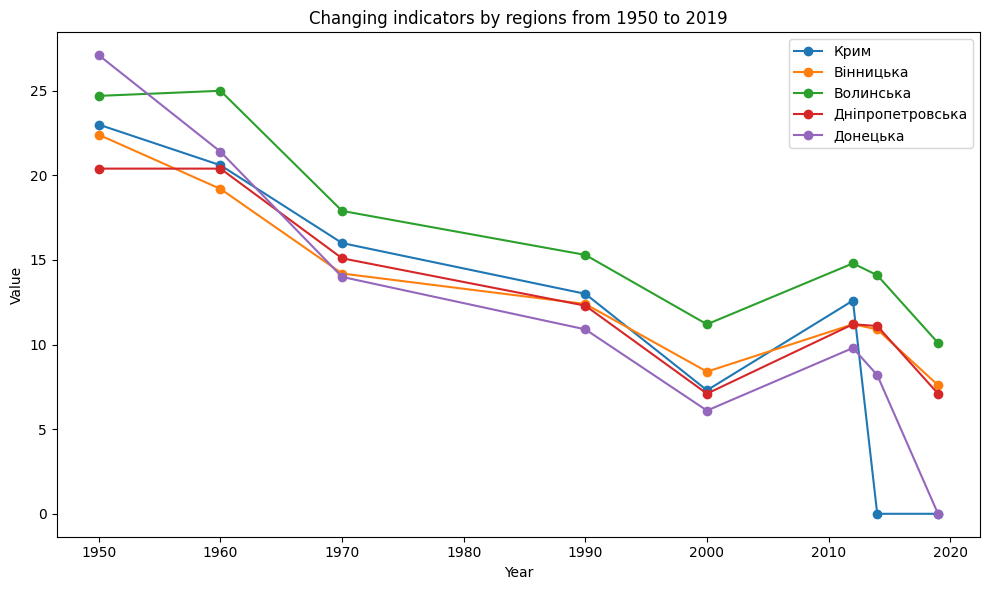

In [5]:
table_melted = table[:5].melt(id_vars=["Регіон"], var_name="Рік", value_name="Значення")
table_melted["Рік"] = table_melted["Рік"].astype(int)

fig, ax = plt.subplots(figsize=(10, 6))

for region in table[:5]['Регіон']:
    region_data = table_melted[table_melted["Регіон"] == region]
    ax.plot(region_data["Рік"], region_data["Значення"], marker='o', label=region)

ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Changing indicators by regions from 1950 to 2019')

ax.legend()

plt.tight_layout()
plt.show()

In [6]:
print(table.shape)

(28, 9)


In [7]:
table.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [8]:
table.isnull().sum()

Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64

In [9]:
table.drop(27, axis=0)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,0.0,0.0
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,0.0
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [10]:
table.replace(0, table.mean(numeric_only=True).astype('float64', errors='ignore'), inplace=True)
table

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.000000,20.600000,16.000000,13.0,7.3,12.6,10.346429,6.875
1,Вінницька,22.400000,19.200000,14.200000,12.4,8.4,11.2,10.900000,7.600
2,Волинська,24.700000,25.000000,17.900000,15.3,11.2,14.8,14.100000,10.100
3,Дніпропетровська,20.400000,20.400000,15.100000,12.3,7.1,11.2,11.100000,7.100
4,Донецька,27.100000,21.400000,14.000000,10.9,6.1,9.8,8.200000,6.875
5,Житомирська,26.100000,22.300000,15.900000,12.9,8.9,12.2,12.000000,7.900
6,Закарпатська,31.400000,27.300000,20.700000,16.8,11.5,15.1,14.600000,10.400
7,Запорізька,21.900000,19.700000,15.000000,12.4,7.1,10.6,10.600000,6.800
8,Івано-Франківська,24.300000,24.800000,18.200000,15.5,10.3,12.4,12.200000,8.800
9,Київська,20.400000,18.900000,15.600000,12.3,7.3,12.2,12.100000,8.000


In [11]:
ab_2019_regions = table[table['2019'] > int(table.loc[27, '2019'])]
ab_2019_regions

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,24.700000,25.0,17.9,15.3,11.2,14.8,14.1,10.1
6,Закарпатська,31.400000,27.3,20.7,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300000,24.8,18.2,15.5,10.3,12.4,12.2,8.8
12,Львівська,23.400000,24.0,17.1,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100000,19.2,14.8,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900000,26.7,19.3,15.8,11.8,15.9,14.8,10.7
20,Херсонська,20.800000,21.4,16.6,14.3,8.5,11.7,11.5,8.1
23,Чернівецька,24.700000,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Київ,21.442857,17.4,15.9,12.0,7.3,12.0,12.1,11.0
27,Україна,22.800000,20.5,15.2,12.6,7.8,11.4,11.1,8.1


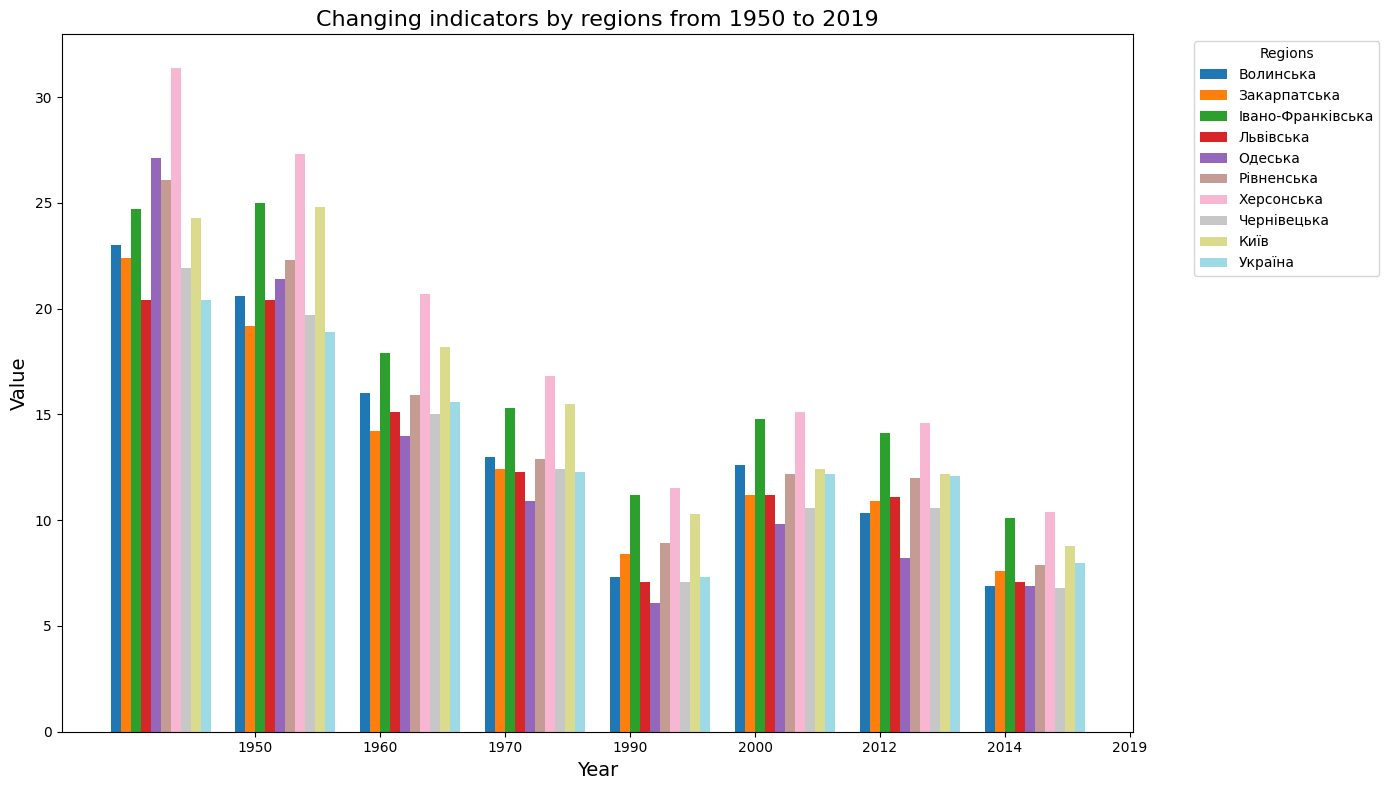

In [13]:
fig, ax = plt.subplots(figsize=(14, 8))

colors = plt.cm.tab20(np.linspace(0, 1, len(ab_2019_regions['Регіон'])))

years = ab_2019_regions.columns[1:]
bar_width = 0.08
index = np.arange(len(years))

for i, region in enumerate(ab_2019_regions['Регіон']):
    values = table.iloc[i, 1:]
    ax.bar(index + i * bar_width, values, bar_width, label=region, color=colors[i])

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.set_title('Changing indicators by regions from 1950 to 2019', fontsize=16)
ax.set_xticks(index + bar_width * (len(table['Регіон']) / 2))
ax.set_xticklabels(years)

ax.legend(title='Regions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()